In [52]:
import numpy as np
import pandas as pd

In [54]:
df = pd.read_csv('Product_Recommendation.csv')
df.head()

,Customer_ID,Age,Gender,Location,Income,Browsing_History,Previous_Purchases,Preferred_Device,Product_Category,Time_Spent_on_Site
0,af09abc0-4835-4376-af52-758c10ff7e97,72,Male,Suburban,NaN,Clothing,8,Desktop,Clothing,78.718422
1,00ce02c1-d45a-4e5a-bd6e-d34d11f90647,72,Female,Rural,100071.0,Books,1,Desktop,Clothing,71.882840
2,b59bc34e-84de-4cc2-b45a-8e5254b5b7bf,72,Male,Urban,25734.0,Sports,1,Mobile,Food,105.186397
3,820cb025-c3e9-4a92-9ca6-91fb303b526e,22,Male,Rural,115576.0,Food,7,Desktop,Food,98.117595
4,232f52b9-3f95-4c70-91e3-ec9585c91802,33,Female,Rural,130314.0,Clothing,2,Mobile,Clothing,119.650952


In [56]:
df.shape

(800, 10)

In [58]:
data_cols =df.columns.tolist()
print(data_cols)

['Customer_ID', 'Age', 'Gender', 'Location', 'Income', 'Browsing_History', 'Previous_Purchases', 'Preferred_Device', 'Product_Category', 'Time_Spent_on_Site']


In [60]:
df.dtypes

Customer_ID            object
Age                     int64
Gender                 object
Location               object
Income                float64
Browsing_History       object
Previous_Purchases      int64
Preferred_Device       object
Product_Category       object
Time_Spent_on_Site    float64
dtype: object

In [62]:
df.describe()

,Age,Income,Previous_Purchases,Time_Spent_on_Site
count,800.000000,682.000000,800.000000,773.000000
mean,49.038750,84407.494135,4.916250,62.454720
std,17.784265,38206.118860,2.504911,33.757387
min,18.000000,20194.000000,1.000000,5.091183
25%,34.000000,49362.500000,3.000000,31.734074
50%,49.000000,85488.500000,5.000000,62.892357
75%,64.250000,117173.250000,7.000000,91.772655
max,79.000000,149549.000000,9.000000,119.811766


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         800 non-null    object 
 1   Age                 800 non-null    int64  
 2   Gender              657 non-null    object 
 3   Location            800 non-null    object 
 4   Income              682 non-null    float64
 5   Browsing_History    800 non-null    object 
 6   Previous_Purchases  800 non-null    int64  
 7   Preferred_Device    800 non-null    object 
 8   Product_Category    800 non-null    object 
 9   Time_Spent_on_Site  773 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 62.6+ KB


In [66]:
df.isnull().sum()

Customer_ID             0
Age                     0
Gender                143
Location                0
Income                118
Browsing_History        0
Previous_Purchases      0
Preferred_Device        0
Product_Category        0
Time_Spent_on_Site     27
dtype: int64

In [78]:
df = df.drop(['Customer_ID','Preferred_Device'],axis=1)
x = df.select_dtypes(include=['object']).columns
df[x] = df[x].fillna(df[x].mode().iloc[0])
y = df.select_dtypes(include= ['float64']).columns
df[y] = df[y].fillna(df[y].mean())
p = df.select_dtypes(include= ['int64']).columns
df[p] = df[p].fillna(df[p].mean())

KeyError: "['Customer_ID', 'Preferred_Device'] not found in axis"

In [70]:
from sklearn.preprocessing import OneHotEncoder
z = OneHotEncoder(sparse_output=False)
encoded_dataframes = []
for column in x:
    encoded = z.fit_transform(df[[column]])
    encoded_df = pd.DataFrame(encoded, columns=z.get_feature_names_out([column]))
    encoded_dataframes.append(encoded_df)

df = pd.concat([df.drop(columns=x)] + encoded_dataframes, axis=1)

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[y] = scaler.fit_transform(df[y])
df[p] = scaler.fit_transform(df[p])
print(df)

          Age    Income  Previous_Purchases  Time_Spent_on_Site  \
0    0.885246  0.496413               0.875            0.641796   
1    0.885246  0.617502               0.000            0.582212   
2    0.885246  0.042828               0.000            0.872513   
3    0.065574  0.737366               0.750            0.810896   
4    0.245902  0.851301               0.125            0.998598   
..        ...       ...                 ...                 ...   
795  0.344262  0.926543               1.000            0.759107   
796  0.081967  0.572896               0.000            0.406973   
797  0.442623  0.852105               1.000            0.301804   
798  0.983607  0.519454               0.875            0.383333   
799  0.721311  0.463407               0.500            0.500028   

     Gender_Female  Gender_Male  Gender_Other  Location_Rural  \
0              0.0          1.0           0.0             0.0   
1              1.0          0.0           0.0             1.0   


In [ ]:
target_columns = [col for col in df.columns if col.startswith('Product_Category_')]
b = df[target_columns]
a = df.drop(target_columns, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)
print(f"Feature training set shape: {a_train.shape}")
print(f"Feature testing set shape: {a_test.shape}")
print(f"Target training set shape: {b_train.shape}")
print(f"Target testing set shape: {b_test.shape}")

In [ ]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(a_train, b_train)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(a_test)
linreg_mse = mean_squared_error(b_test, linreg_pred)
linreg_mae = mean_absolute_error(b_test, linreg_pred)
linreg_r2 = r2_score(b_test, linreg_pred)
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')
 

Mean Squared Error: 0.16727315425724013
Mean Absolute Error: 0.3237817511522894
R-squared: -0.047182949628638095


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(a_train, b_train) 

In [ ]:
rf_pred = rf_model.predict(a_test)
rf_mse = mean_squared_error(b_test, rf_pred)
rf_mae = mean_absolute_error(b_test, rf_pred)
rf_r2 = r2_score(b_test, rf_pred)
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')


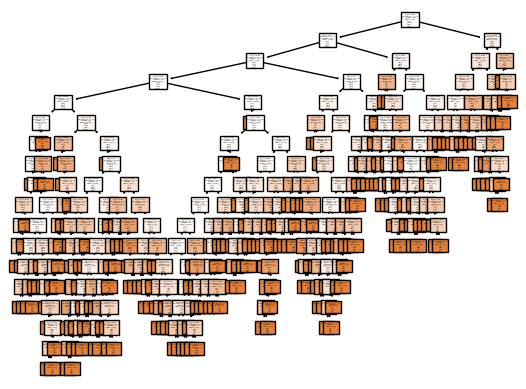

In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[1], filled= True)
plt.show()

In [48]:
best_model = linreg_model if linreg_mse < rf_mse else rf_model
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
